
# Parte 1 | Se crea la iteracion SOR, y los enunciados de la primera parte


## Creación de la matriz de temperaturas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def crear_matriz_temperaturas(N, semilla=0, valores_bordes=[1,1,1,1]):

  # armamos una matriz N+1xN+1 llena de ceros.
  # Se le puede pasar una semilla a cada nodo, por defecto en 0.
  # Los valores bordes, establecidos por el TP, por defecto serán [1,1,1,1] donde corresponde [NORTE, SUR, ESTE, OESTE]

  matriz = np.zeros((N+1,N+1)) # Matriz principal, llena de 0

  if( semilla ): # Se establece una semilla por parámetro
    for i in range(1,N):
      for j in range(1, N):
        matriz[i, j] = semilla

  # Ponemos en los bordes algún valor, defecto [1,1,1,1]
  matriz[0, 1:-1] = valores_bordes[0] # Primera fila, desde la primera columna hasta la anteúltima
  matriz[-1, 1:-1] = valores_bordes[1] # Última fila, desde la primera columna hasta la anteúltima
  matriz[1:-1, -1] = valores_bordes[2] # Última columna: desde la primera fila hasta la anteúltima
  matriz[1:-1, 0] = valores_bordes[3] # Primera columna: desde la primera fila hasta la anteúltima

  # La matriz generada queda del estilo =>

  '''
  0 1 1 1 0
  1 | | | 1
  1 | | | 1
  1 | | | 1
  0 1 1 1 0
  '''

  print(f"Se creó una matriz con {len(matriz[:, 0]) - 2}x{len(matriz[0, :]) - 2} nodos (N-1)x(N-1)")
  print(f"La matriz final tiene dimensión {len(matriz[:, 0])}x{len(matriz[0, :])}")

  return matriz

crear_matriz_temperaturas(4, semilla=3, valores_bordes=[1,5,10,12])

Se creó una matriz con 3x3 nodos (N-1)x(N-1)
La matriz final tiene dimensión 5x5


array([[ 0.,  1.,  1.,  1.,  0.],
       [12.,  3.,  3.,  3., 10.],
       [12.,  3.,  3.,  3., 10.],
       [12.,  3.,  3.,  3., 10.],
       [ 0.,  5.,  5.,  5.,  0.]])

## Creación de Solucion SOR para una matriz con posibilidad de iterar distintos omegas

In [2]:
def calcular_tolerancia(T_sig, T_ant): # Dada 2 matrices calculamos las normas
  numerador = np.linalg.norm(T_sig[1:-1, 1:-1]- T_ant[1:-1, 1:-1]) # solo los valores de los nodos
  denominador = np.linalg.norm(T_sig[1:-1, 1:-1])

  return numerador / denominador

def mostrar_matriz(m): # Por si queremos mostrar la matriz
  for i in m:
    print('\t'.join(map(str, i)))

def generar_lista_w():
  return np.linspace(1., 1.95, 20)

def generar_w_formula(i):
  return [2 / ( 1+ np.sin( np.pi / (i - 1) ) )]


def crear_solucion_sor(T, tolerancia, generar_w_teorico=True, **w_personalizado_y_output_datos):
  # Dada una matriz T, tolerancia, resuelve por medio de TSOR la matriz proporcionada.

  #Si no se envia ninguna informacion en generar_w_teorico, se calcula respecto al pedido de cátedra
  #Si no se genera un arreglo de 1 a 1.95 saltando de a 0.05

  total_nodos = len(T[0, :]) # Necesitamos saber la cantidad de nodos, matriz cuadrada por lo tanto no importa cual fila agarremos

  if( generar_w_teorico ): #Si se pasa una lista de w, hay que utilizarla
    w_a_iterar = generar_w_formula(total_nodos)
  else:
    w_a_iterar = generar_lista_w() #Generamos los i iterables

  lambda_mas_grande = 0
  for w in w_a_iterar:
    T_iterativa = T.copy() # copia de la ultima T para cada w
    n_iteracion = 0
    ultima_tolerancia = 1
    while True:
        T_anterior = T_iterativa.copy()  # copia de la última T

        for i in range(1, total_nodos - 1):
            for j in range(1, total_nodos - 1):
                # https://drive.google.com/file/d/1xz66KwFax61omaQwcZxJjawLqvfwy21M
                T_iterativa[i, j] = ( (w / 4) * (T_iterativa[i - 1, j] + T_iterativa[i + 1, j] + T_iterativa[i, j - 1] + T_iterativa[i, j + 1]) ) + ( (1 - w) * T_iterativa[i, j] )

        tolerancia_calculada = calcular_tolerancia(T_iterativa, T_anterior)
        if( tolerancia_calculada < tolerancia ):
            print(f"Se logró la convergencia luego de {n_iteracion + 1} iteraciones. | última tolerancia : {tolerancia_calculada} | Δ = {np.abs(tolerancia_calculada - tolerancia)}")
            print(f"w = {w}")

            if( 'informacion' in w_personalizado_y_output_datos.keys() ): # se quiere guardar informacion
              w_personalizado_y_output_datos['informacion'][w] = [ n_iteracion + 1, tolerancia_calculada ] # guardo [ iteraciones, tolerancia calculada ] auque finalmente no lo uso.

            print(T_iterativa)
            break

        ultima_tolerancia = tolerancia_calculada
        n_iteracion += 1

    if( lambda_mas_grande < (tolerancia_calculada / ultima_tolerancia) ):
      lambda_mas_grande = tolerancia_calculada / ultima_tolerancia


  if ( generar_w_teorico ): # Si se decidió solucionar con un solo w, devolvemos la matriz solución
    return T_iterativa[1:-1, 1:-1]
  else:
    print(f"λ mas grande encontrado en las iteraciones = {lambda_mas_grande}")

crear_solucion_sor(crear_matriz_temperaturas(4), 0.01)

Se creó una matriz con 3x3 nodos (N-1)x(N-1)
La matriz final tiene dimensión 5x5
Se logró la convergencia luego de 6 iteraciones. | última tolerancia : 0.0021399474930372253 | Δ = 0.007860052506962775
w = 1.17157287525381
[[0.         1.         1.         1.         0.        ]
 [1.         0.99808214 0.99886598 0.99964982 1.        ]
 [1.         0.99886598 0.99932514 0.9997843  1.        ]
 [1.         0.99964982 0.9997843  0.99991879 1.        ]
 [0.         1.         1.         1.         0.        ]]


array([[0.99808214, 0.99886598, 0.99964982],
       [0.99886598, 0.99932514, 0.9997843 ],
       [0.99964982, 0.9997843 , 0.99991879]])

In [3]:
crear_solucion_sor(crear_matriz_temperaturas(4), 0.01)

Se creó una matriz con 3x3 nodos (N-1)x(N-1)
La matriz final tiene dimensión 5x5
Se logró la convergencia luego de 6 iteraciones. | última tolerancia : 0.0021399474930372253 | Δ = 0.007860052506962775
w = 1.17157287525381
[[0.         1.         1.         1.         0.        ]
 [1.         0.99808214 0.99886598 0.99964982 1.        ]
 [1.         0.99886598 0.99932514 0.9997843  1.        ]
 [1.         0.99964982 0.9997843  0.99991879 1.        ]
 [0.         1.         1.         1.         0.        ]]


array([[0.99808214, 0.99886598, 0.99964982],
       [0.99886598, 0.99932514, 0.9997843 ],
       [0.99964982, 0.9997843 , 0.99991879]])

In [4]:
informacion_a_graficar = {}

sol = crear_solucion_sor(crear_matriz_temperaturas(4), 0.01, generar_w_teorico=False, informacion=informacion_a_graficar)
informacion_a_graficar

Se creó una matriz con 3x3 nodos (N-1)x(N-1)
La matriz final tiene dimensión 5x5
Se logró la convergencia luego de 8 iteraciones. | última tolerancia : 0.005519231850580564 | Δ = 0.0044807681494194364
w = 1.0
[[0.         1.         1.         1.         0.        ]
 [1.         0.99267709 0.99267611 0.99633789 1.        ]
 [1.         0.99267611 0.99267578 0.99633785 1.        ]
 [1.         0.99633789 0.99633785 0.99816892 1.        ]
 [0.         1.         1.         1.         0.        ]]
Se logró la convergencia luego de 7 iteraciones. | última tolerancia : 0.007052994937660359 | Δ = 0.002947005062339641
w = 1.05
[[0.         1.         1.         1.         0.        ]
 [1.         0.99190377 0.99235645 0.99639194 1.        ]
 [1.         0.99235645 0.99278389 0.99659372 1.        ]
 [1.         0.99639194 0.99659372 0.9983921  1.        ]
 [0.         1.         1.         1.         0.        ]]
Se logró la convergencia luego de 6 iteraciones. | última tolerancia : 0.00992646

{1.0: [8, 0.005519231850580564],
 1.05: [7, 0.007052994937660359],
 1.1: [6, 0.009926467042285761],
 1.15: [6, 0.004354621262334463],
 1.2: [6, 0.0011349133284721908],
 1.25: [6, 0.005692682743705237],
 1.3: [7, 0.0019458261564988084],
 1.35: [7, 0.005523220049807951],
 1.4: [8, 0.0020307885618140956],
 1.45: [8, 0.005706728118859917],
 1.5: [9, 0.0027663496430651653],
 1.5499999999999998: [9, 0.006573860381760488],
 1.6: [10, 0.0072310900970779055],
 1.65: [12, 0.00783722779846313],
 1.7: [15, 0.008152163440319467],
 1.75: [18, 0.006689410542080772],
 1.7999999999999998: [23, 0.007203553586902233],
 1.85: [30, 0.00969839263451827],
 1.9: [46, 0.007958316408537657],
 1.95: [91, 0.00995697032894683]}

## Solucion sencilla N = 4 R = 0.01

In [5]:
crear_solucion_sor(crear_matriz_temperaturas(4), 0.01)

Se creó una matriz con 3x3 nodos (N-1)x(N-1)
La matriz final tiene dimensión 5x5
Se logró la convergencia luego de 6 iteraciones. | última tolerancia : 0.0021399474930372253 | Δ = 0.007860052506962775
w = 1.17157287525381
[[0.         1.         1.         1.         0.        ]
 [1.         0.99808214 0.99886598 0.99964982 1.        ]
 [1.         0.99886598 0.99932514 0.9997843  1.        ]
 [1.         0.99964982 0.9997843  0.99991879 1.        ]
 [0.         1.         1.         1.         0.        ]]


array([[0.99808214, 0.99886598, 0.99964982],
       [0.99886598, 0.99932514, 0.9997843 ],
       [0.99964982, 0.9997843 , 0.99991879]])

## Punto C) Se crea una solucion para una matriz N = 4 , R = 0.01 simple como modo de prueba


In [6]:
informacion_a_graficar = {}

sol = crear_solucion_sor(crear_matriz_temperaturas(4), 0.01, generar_w_teorico=False, informacion=informacion_a_graficar)

valores_w, arreglo_iteraciones_y_tolerancia = zip(*informacion_a_graficar.items())

for i in range(len(valores_w)):
  print(f"w = {valores_w[i]:0.2f} | iteraciones necesarias = {arreglo_iteraciones_y_tolerancia[i][0]}")


Se creó una matriz con 3x3 nodos (N-1)x(N-1)
La matriz final tiene dimensión 5x5
Se logró la convergencia luego de 8 iteraciones. | última tolerancia : 0.005519231850580564 | Δ = 0.0044807681494194364
w = 1.0
[[0.         1.         1.         1.         0.        ]
 [1.         0.99267709 0.99267611 0.99633789 1.        ]
 [1.         0.99267611 0.99267578 0.99633785 1.        ]
 [1.         0.99633789 0.99633785 0.99816892 1.        ]
 [0.         1.         1.         1.         0.        ]]
Se logró la convergencia luego de 7 iteraciones. | última tolerancia : 0.007052994937660359 | Δ = 0.002947005062339641
w = 1.05
[[0.         1.         1.         1.         0.        ]
 [1.         0.99190377 0.99235645 0.99639194 1.        ]
 [1.         0.99235645 0.99278389 0.99659372 1.        ]
 [1.         0.99639194 0.99659372 0.9983921  1.        ]
 [0.         1.         1.         1.         0.        ]]
Se logró la convergencia luego de 6 iteraciones. | última tolerancia : 0.00992646

## Punto D) Se resuelve una matriz con N = 32, R = 0.01, iterando con distintos w y generando las graficas n vs ⍵ y n vs ⍴(SOR)

Se creó una matriz con 31x31 nodos (N-1)x(N-1)
La matriz final tiene dimensión 33x33
Se logró la convergencia luego de 44 iteraciones. | última tolerancia : 0.009803151513324618 | Δ = 0.00019684848667538175
w = 1.0
[[0.         1.         1.         ... 1.         1.         0.        ]
 [1.         0.98444382 0.96959617 ... 0.97131557 0.98563601 1.        ]
 [1.         0.96959617 0.94055616 ... 0.9438201  0.97186507 1.        ]
 ...
 [1.         0.97131557 0.9438201  ... 0.94735502 0.97367482 1.        ]
 [1.         0.98563601 0.97186507 ... 0.97367482 0.98683741 1.        ]
 [0.         1.         1.         ... 1.         1.         0.        ]]
Se logró la convergencia luego de 44 iteraciones. | última tolerancia : 0.009814546268297475 | Δ = 0.0001854537317025253
w = 1.05
[[0.         1.         1.         ... 1.         1.         0.        ]
 [1.         0.9858559  0.97232681 ... 0.97400998 0.98700033 1.        ]
 [1.         0.97232681 0.94583887 ... 0.94904721 0.97451229 1.  

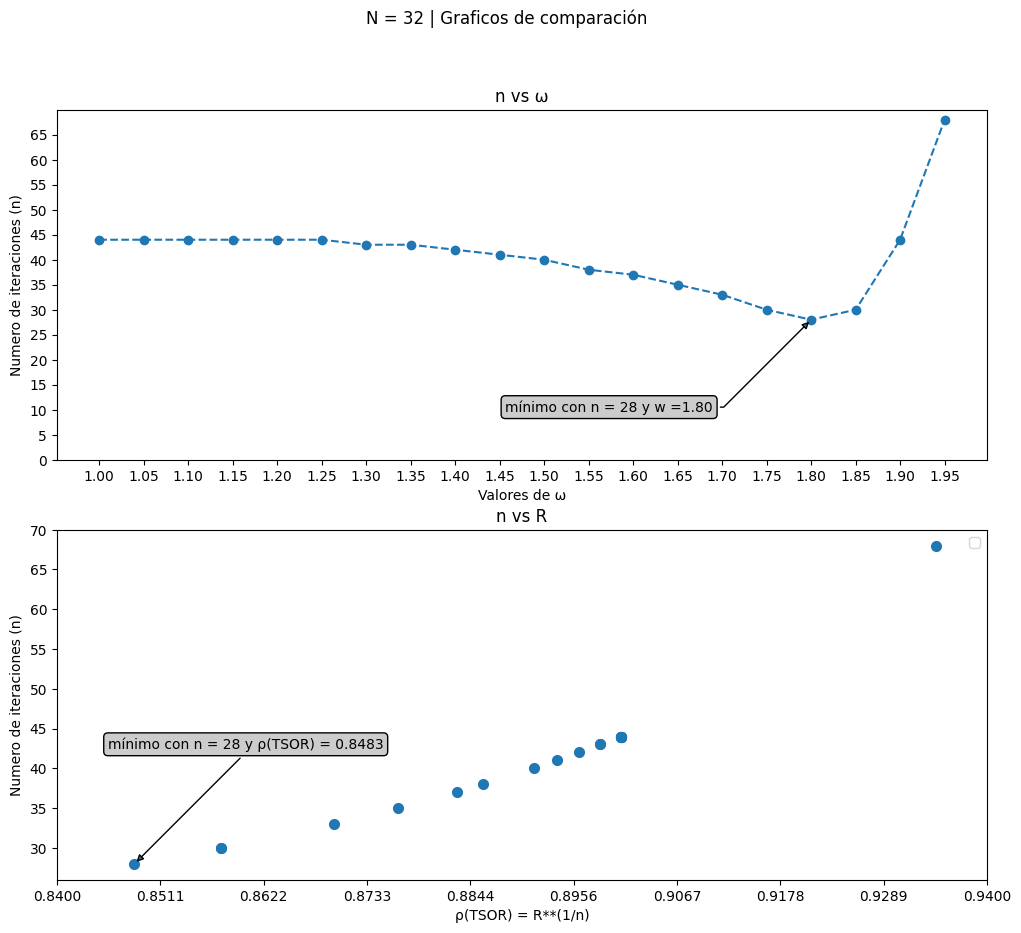

In [7]:
informacion_a_graficar = {}

crear_solucion_sor(crear_matriz_temperaturas(32), 0.01, generar_w_teorico=False, informacion=informacion_a_graficar)

listas = sorted(informacion_a_graficar.items())

x, y = zip(*listas) # unpackeamos en 2 listas

figure, axis = plt.subplots(2, 1, figsize=(12,10))

valores_iteraciones = list( iteraciones[0] for iteraciones in y )

axis[0].set_title("n vs ⍵")
axis[0].plot(x, valores_iteraciones, linestyle='--', marker='o')
axis[0].set_xlabel("Valores de ⍵")
axis[0].set_yticks(range(0, 70, 5))
axis[0].set_ylabel("Numero de iteraciones (n)")
axis[0].set_xticks(np.linspace(1., 1.95, 20))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="-|>",
    #connectionstyle="angle,angleA=-180,angleB=90,rad=5")
    connectionstyle="angle,angleA=0,angleB=45,rad=0")

posicion_x_min = x[ valores_iteraciones.index(min(valores_iteraciones)) ]
posicion_y_min = min(valores_iteraciones)

axis[0].annotate(f'mínimo con n = {posicion_y_min} y w ={posicion_x_min:.2f}',
                   (posicion_x_min, posicion_y_min),
                   textcoords='offset points', xytext =(posicion_x_min - 222, posicion_y_min - 94),
                   bbox=bbox, arrowprops=arrowprops)

valores_n, _ = zip(*list(informacion_a_graficar.values()))
valores_n = np.array(valores_n)
valores_tolerancia = np.array(list( tolerancia[1] for tolerancia in y ))

valores_radio = 0.01**(1/valores_n) ## Acá el profe me dijo que era 0.01, no la tolerancia calculada de cada iteracion

axis[1].set_title("n vs R")

axis[1].scatter(valores_radio, valores_n,linewidth=2)
axis[1].set_ylabel("Numero de iteraciones (n)")
axis[1].set_xlabel("ρ(TSOR) = R**(1/n)")
axis[1].set_xticks(np.linspace(.84, .94, num=10))

posicion_n_min = min(valores_n)
posicion_w_min = min(valores_radio)

axis[1].annotate(f'mínimo con n = {posicion_n_min} y ρ(TSOR) = {posicion_w_min:.4f}',
                   (posicion_w_min, posicion_n_min),
                   textcoords='offset points', xytext =(posicion_w_min - 20, posicion_n_min + 55),
                   bbox=bbox, arrowprops=arrowprops)

plt.legend()
figure.suptitle("N = 32 | Graficos de comparación")
plt.show()



---





---



---



---



---



# Parte 2 | Se genera una solución para mi padrón (97819) con la metodología del enunciado, y con R = *0.001*

In [8]:
# mi padrón: 97819
# tolerancia = 0.001 => 1e-3
sol = crear_solucion_sor(crear_matriz_temperaturas(8, semilla=15, valores_bordes=[70,80,10,90]), 1e-3)

Se creó una matriz con 7x7 nodos (N-1)x(N-1)
La matriz final tiene dimensión 9x9
Se logró la convergencia luego de 13 iteraciones. | última tolerancia : 0.0005285489309536774 | Δ = 0.0004714510690463226
w = 1.4464626921716894
[[ 0.         70.         70.         70.         70.         70.
  70.         70.          0.        ]
 [90.         78.81310465 73.37117991 69.78052721 66.2945612  61.86369504
  54.90234328 41.56264778 10.        ]
 [90.         81.63990337 75.08852326 69.45177122 63.56003977 56.27680979
  46.18876733 31.34758335 10.        ]
 [90.         82.71704039 75.9733257  69.41206373 62.23260959 53.50144492
  42.22945931 27.63618096 10.        ]
 [90.         83.29474156 76.72925591 70.00998639 62.46598919 53.26711397
  41.58821352 26.96428738 10.        ]
 [90.         83.73722793 77.67004869 71.44153723 64.35436926 55.51010639
  43.88847407 28.6305435  10.        ]
 [90.         83.98681039 78.77949553 73.73167095 67.99643631 60.52689552
  49.82240596 33.66804226 10. 

In [9]:
sol

array([[78.81310465, 73.37117991, 69.78052721, 66.2945612 , 61.86369504,
        54.90234328, 41.56264778],
       [81.63990337, 75.08852326, 69.45177122, 63.56003977, 56.27680979,
        46.18876733, 31.34758335],
       [82.71704039, 75.9733257 , 69.41206373, 62.23260959, 53.50144492,
        42.22945931, 27.63618096],
       [83.29474156, 76.72925591, 70.00998639, 62.46598919, 53.26711397,
        41.58821352, 26.96428738],
       [83.73722793, 77.67004869, 71.44153723, 64.35436926, 55.51010639,
        43.88847407, 28.6305435 ],
       [83.98681039, 78.77949553, 73.73167095, 67.99643631, 60.52689552,
        49.82240596, 33.66804226],
       [83.42995227, 79.72912418, 76.70794848, 73.37058025, 68.77593384,
        61.2044148 , 46.2182449 ]])

<ipython-input-10-607f560615b3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([80 for i in range(len(sol[0, :]) + 1)])
<ipython-input-10-607f560615b3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([90 for i in range(len(sol[0, :]) + 1)])
<ipython-input-10-607f560615b3>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([10 for i in range(len(sol[0, :]) + 1)])
<ipython-input-10-607f560615b3>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels([70 for i in range(len(sol[0, :]) + 1)])


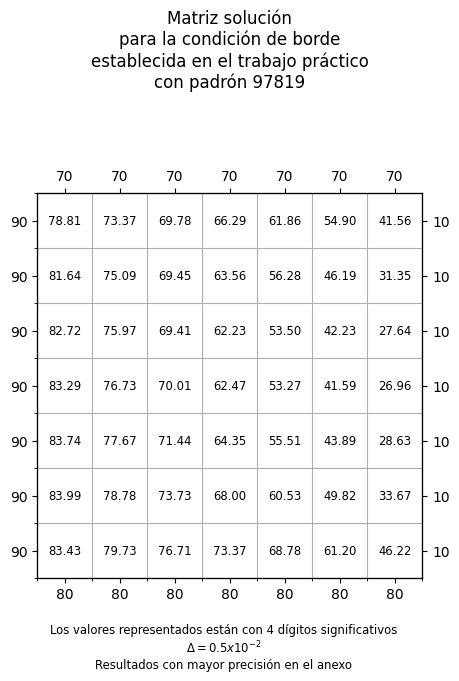

In [10]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True)

intersection_matrix = sol.transpose()

from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('mycmap', ['white' for i in range(len(sol[0, :]))])

ax.matshow(intersection_matrix, cmap=cmap)

ax.set_xticklabels([80 for i in range(len(sol[0, :]) + 1)])
ax.set_yticklabels([90 for i in range(len(sol[0, :]) + 1)])

for i in range(len(sol[0, :])):
    for j in range(len(sol[0, :])):
        c = intersection_matrix[i,j]
        ax.text(i, j, f"{c:.2f}", va='center', ha='center', size='small')

ax.set_title("Matriz solución" +  "\n" + "para la condición de borde" +  "\n" + "establecida en el trabajo práctico" + "\n" + "con padrón 97819", pad=76)

plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
plt.grid(which='minor')
#ax.set_ylabel("Posicion en Y")

ax2 = ax.twinx()

ax2.set_ylim(ax.get_ylim())
ax2.set_yticklabels([10 for i in range(len(sol[0, :]) + 1)])
ax2.set_box_aspect(1)

ax3 = ax.twiny()

#ax3.set_xlabel("Posicion en X")
ax3.set_xlim(ax.get_xlim())
ax3.set_xticklabels([70 for i in range(len(sol[0, :]) + 1)])
ax3.set_box_aspect(1)

text = fig.text(0.50, -0.07, r'Los valores representados están con 4 dígitos significativos' + '\n' + '$Δ = 0.5x10^{-2}$' + '\n' + 'Resultados con mayor precisión en el anexo', horizontalalignment='center', wrap=False, size='small')

plt.show()



<ipython-input-11-507ef8d2a446>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([80 for i in range(len(sol[0, :]) + 1)])
<ipython-input-11-507ef8d2a446>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([90 for i in range(len(sol[0, :]) + 1)])
<ipython-input-11-507ef8d2a446>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([10 for i in range(len(sol[0, :]) + 1)])
<ipython-input-11-507ef8d2a446>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels([70 for i in range(len(sol[0, :]) + 1)])


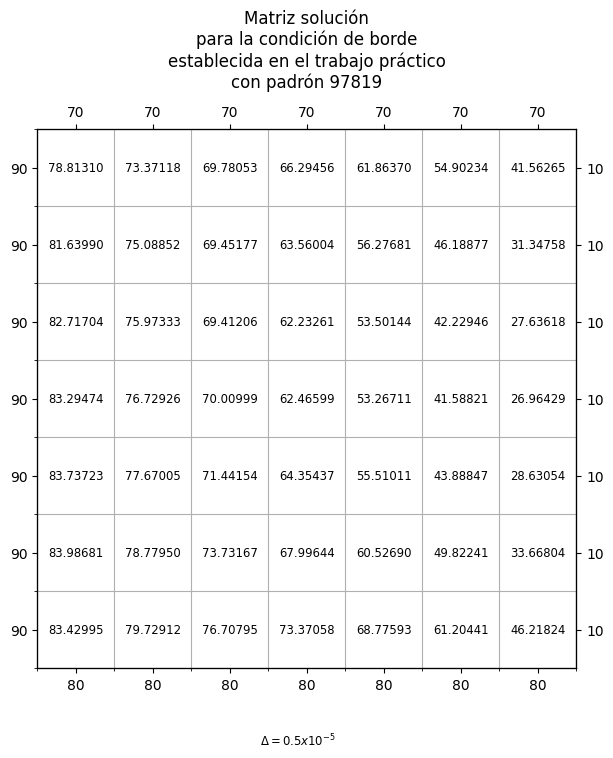

In [11]:
fig, ax = plt.subplots(figsize=(7, 7), sharex=True)

intersection_matrix = sol.transpose()

from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('mycmap', ['white' for i in range(len(sol[0, :]))])

ax.matshow(intersection_matrix, cmap=cmap)

ax.set_xticklabels([80 for i in range(len(sol[0, :]) + 1)])
ax.set_yticklabels([90 for i in range(len(sol[0, :]) + 1)])

for i in range(len(sol[0, :])):
    for j in range(len(sol[0, :])):
        c = intersection_matrix[i,j]
        ax.text(i, j, f"{c:.5f}", va='center', ha='center', size='small')

ax.set_title("Matriz solución" +  "\n" + "para la condición de borde" +  "\n" + "establecida en el trabajo práctico" + "\n" + "con padrón 97819", pad=30)

plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
plt.grid(which='minor')
#ax.set_ylabel("Posicion en Y")

ax2 = ax.twinx()

ax2.set_ylim(ax.get_ylim())
ax2.set_yticklabels([10 for i in range(len(sol[0, :]) + 1)])
ax2.set_box_aspect(1)

ax3 = ax.twiny()

#ax3.set_xlabel("Posicion en X")
ax3.set_xlim(ax.get_xlim())
ax3.set_xticklabels([70 for i in range(len(sol[0, :]) + 1)])
ax3.set_box_aspect(1)

text = fig.text(0.50, 0, '$Δ = 0.5x10^{-5}$', horizontalalignment='center', wrap=False, size='small')

plt.show()


<ipython-input-12-7accae101688>:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(colorbar,orientation='horizontal', shrink=0.5)


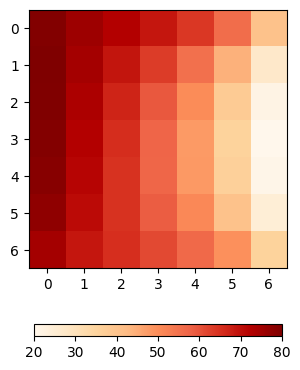

In [12]:
plt.imshow(np.rot90(intersection_matrix, 1), cmap='OrRd')
plt.xticks([i for i in range(7)])

cmap = mpl.cm.OrRd
norm = mpl.colors.Normalize(vmin=20, vmax=80)
colorbar = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

cbar = plt.colorbar(colorbar,orientation='horizontal', shrink=0.5)
cbar.ax.set_xticks([i for i in range(20, 85, 10)])
plt.show()

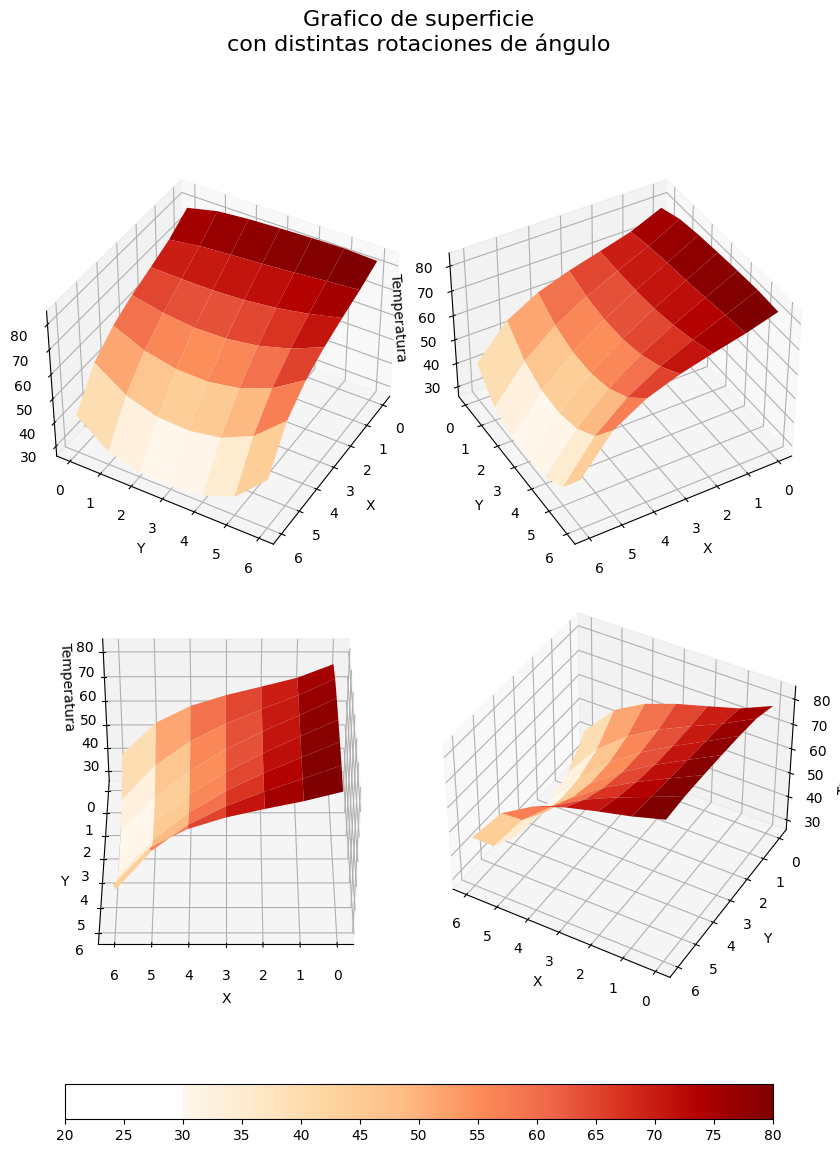

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

# renombro porque me voy a volver loco
matriz_de_soluciones = sol
palette_color = 'OrRd'

coordenadas_en_x = np.arange(matriz_de_soluciones.shape[1])
coordenadas_en_y = np.arange(matriz_de_soluciones.shape[0])
X, Y = np.meshgrid(coordenadas_en_x, coordenadas_en_y)

fig = plt.figure(figsize=(8, 12))

fig.suptitle("Grafico de superficie"+ '\n' + 'con distintas rotaciones de ángulo', fontsize=16)

axs = []
plot = []

elevacion = 40
rotaciones = range(30,150, 30) # Rotaciones en angulo

# numeracion fila-columna y el tercer digito es la posicion 1 arriba izq 2 arriba der 3 abajo der 4 abajo izq
posiciones = [221, 222, 223, 224]

for i in range(len(posiciones)): #Las ubicaciones respectivas en el grid
  graficos = fig.add_subplot(posiciones[i], projection='3d')
  axs.insert(i, graficos)
  plot.insert(i, axs[i].plot_surface(X, Y, matriz_de_soluciones, cmap=palette_color))
  axs[i].set_xlabel('X')
  axs[i].set_ylabel('Y')
  axs[i].set_zlabel('Temperatura')
  axs[i].view_init(elev=elevacion, azim=rotaciones[i])

# https://stackoverflow.com/questions/44178090/displaying-multiple-3d-plots me salvó la vida
plt.tight_layout(pad=0.5)

cmap = mpl.cm.OrRd
norm = mpl.colors.Normalize(vmin=30, vmax=80)
colorbar = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)


cb = plt.colorbar(colorbar, ax=[axs[2], axs[3]], orientation='horizontal', shrink=0.9)
cb.ax.set_xticks([i for i in range(20, 85, 5)])
cb.ax.set_xticklabels([i for i in range(20, 85, 5)])
plt.show()


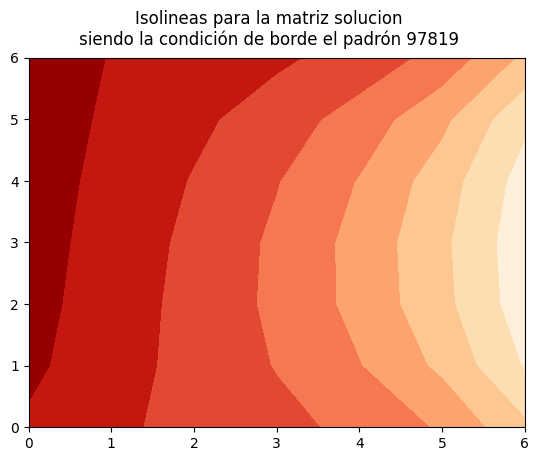

In [14]:
plt.suptitle("Isolineas para la matriz solucion" + '\n' + "siendo la condición de borde el padrón 97819")
plt.contourf(X,Y, matriz_de_soluciones, cmap='OrRd')

# **Probando una matriz grande para conclusiones**

Se creó una matriz con 43x43 nodos (N-1)x(N-1)
La matriz final tiene dimensión 45x45
Se logró la convergencia luego de 2084 iteraciones. | última tolerancia : 9.989382880848746e-08 | Δ = 1.0617119151253406e-10
w = 1.0
[[ 0.         32.         32.         ... 32.         32.
   0.        ]
 [70.         50.9847201  43.4587206  ... 34.45620777 36.01865479
  40.        ]
 [70.         58.48015999 50.93888137 ... 36.07461863 37.61841148
  40.        ]
 ...
 [70.         59.38041334 52.42531175 ... 37.56104865 38.51866464
  40.        ]
 [70.         52.48132772 45.54489762 ... 36.5423846  37.51526231
  40.        ]
 [ 0.         35.         35.         ... 35.         35.
   0.        ]]
Se logró la convergencia luego de 1903 iteraciones. | última tolerancia : 9.979636308815693e-08 | Δ = 2.0363691184306058e-10
w = 1.05
[[ 0.         32.         32.         ... 32.         32.
   0.        ]
 [70.         50.98472094 43.45872228 ... 34.45620946 36.01865564
  40.        ]
 [70.         58.4

Se logró la convergencia luego de 288 iteraciones. | última tolerancia : 9.65894762006446e-08 | Δ = 3.4105237993554016e-09
w = 1.95
[[ 0.         32.         32.         ... 32.         32.
   0.        ]
 [70.         50.98472838 43.45874005 ... 34.4562248  36.01866348
  40.        ]
 [70.         58.48017982 50.93891915 ... 36.07465339 37.61842865
  40.        ]
 ...
 [70.         59.38043055 52.42534674 ... 37.56108014 38.51868015
  40.        ]
 [70.         52.48133651 45.54491472 ... 36.54240004 37.5152701
  40.        ]
 [ 0.         35.         35.         ... 35.         35.
   0.        ]]
λ mas grande encontrado en las iteraciones = 0.9949106398801184


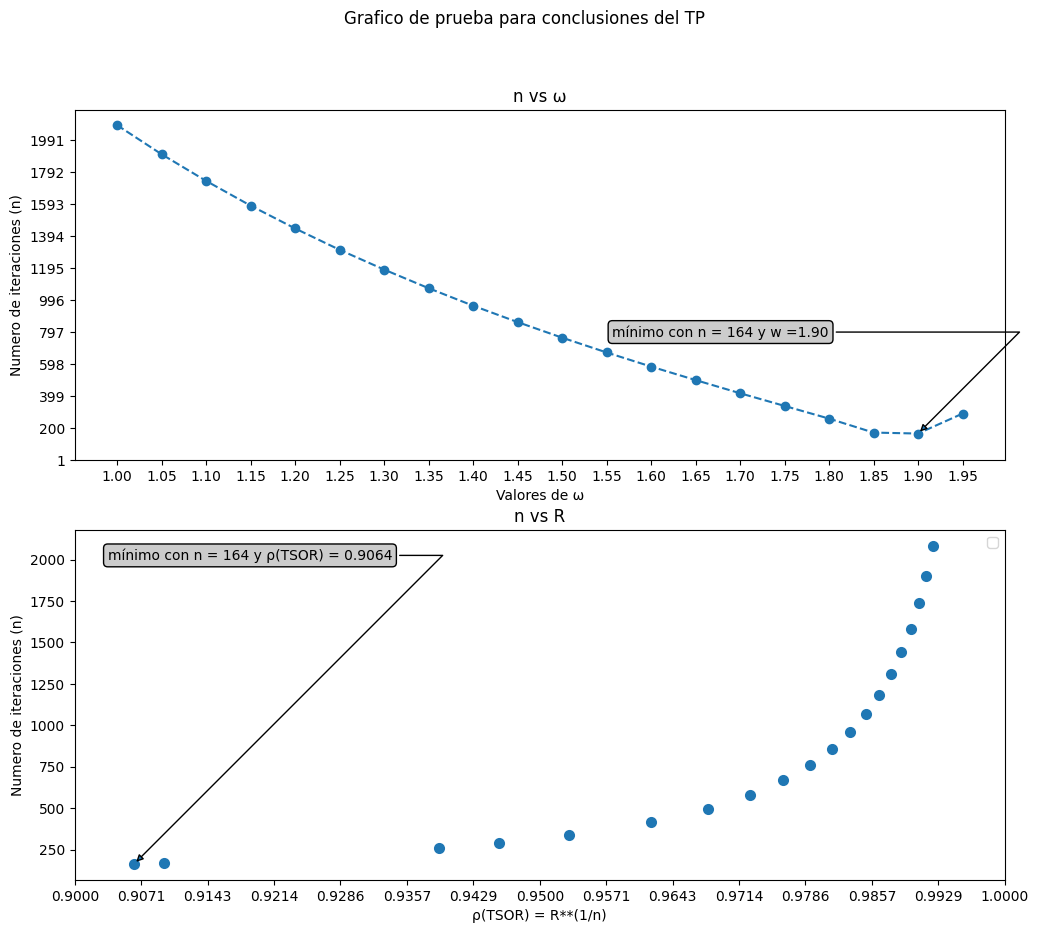

In [15]:
informacion_a_graficar = {}

crear_solucion_sor(crear_matriz_temperaturas(44, valores_bordes=[32,35,40,70]), 1e-7, generar_w_teorico=False, informacion=informacion_a_graficar)

listas = sorted(informacion_a_graficar.items())

x, y = zip(*listas) # unpackeamos en 2 listas

figure, axis = plt.subplots(2, 1, figsize=(12,10))

valores_iteraciones = list( iteraciones[0] for iteraciones in y )

axis[0].set_title("n vs ⍵")
axis[0].plot(x, valores_iteraciones, linestyle='--', marker='o')
axis[0].set_xlabel("Valores de ⍵")
axis[0].set_yticks(range(1, max(valores_iteraciones), 199))
axis[0].set_ylabel("Numero de iteraciones (n)")
axis[0].set_xticks(np.linspace(1., 1.95, 20))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="-|>",
    #connectionstyle="angle,angleA=-180,angleB=90,rad=5")
    connectionstyle="angle,angleA=0,angleB=45,rad=0")

posicion_x_min = x[ valores_iteraciones.index(min(valores_iteraciones)) ]
posicion_y_min = min(valores_iteraciones)

axis[0].annotate(f'mínimo con n = {posicion_y_min} y w ={posicion_x_min:.2f}',
                   (posicion_x_min, posicion_y_min),
                   textcoords='offset points', xytext =(posicion_x_min - 222, posicion_y_min - 94),
                   bbox=bbox, arrowprops=arrowprops)

valores_n, _ = zip(*list(informacion_a_graficar.values()))
valores_n = np.array(valores_n)
valores_tolerancia = np.array(list( tolerancia[1] for tolerancia in y ))

valores_radio = 1e-7**(1/valores_n) ## Acá el profe me dijo que era 0.01, no la tolerancia calculada de cada iteracion

axis[1].set_title("n vs R")

axis[1].scatter(valores_radio, valores_n,linewidth=2)
axis[1].set_ylabel("Numero de iteraciones (n)")
axis[1].set_xlabel("ρ(TSOR) = R**(1/n)")
axis[1].set_xticks(np.linspace(.90, 1, num=15))

posicion_n_min = min(valores_n)
posicion_w_min = min(valores_radio)

axis[1].annotate(f'mínimo con n = {posicion_n_min} y ρ(TSOR) = {posicion_w_min:.4f}',
                   (posicion_w_min, posicion_n_min),
                   textcoords='offset points', xytext =(posicion_w_min - 20, posicion_n_min + 55),
                   bbox=bbox, arrowprops=arrowprops)

plt.legend()
figure.suptitle("Grafico de prueba para conclusiones del TP")
plt.show()

numpy.linalg.norm

In [24]:
np.linalg.norm(np.array([[1, 1, 1], [-0.175, -0.2525, 0.049]]), ord='inf')

ValueError: ignored